In [2]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
# Set up working directory

os.chdir('/Users/joanne/Desktop/WGU/D208/Churn Data')
os.getcwd()

'/Users/joanne/Desktop/WGU/D208/Churn Data'

In [4]:
# Load csv file and make dataframe
df = pd.read_csv('churn_clean.csv')

# Setting to display all columns
pd.set_option('display.max_columns', None)

# Shows first five rows to confirm dataframe has loaded
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

# Data Cleaning and Preparation

In [7]:
# Double check nulls for each row

nulls = [print(column, df[column].isnull().sum()) for column in df if df[column].isna().sum() > 0]

print(nulls)

InternetService 2129
[None]


In [8]:
# Replace nan values in 'InternetService' with 'None' inputs to match dictionary
df['InternetService'].fillna('None', inplace=True)

# Verify that None is in array and not nan
df['InternetService'].unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [9]:
# Check nulls again
(df.isnull().sum(axis=1) > 0).sum()

0

### Check Duplicates

In [11]:
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

### Compare Unique Value Samples Against Dictionary

In [13]:
# Check unique values against dictionary
for col in df:
    print(col, ':', df[col].unique())

CaseOrder : [    1     2     3 ...  9998  9999 10000]
Customer_id : ['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
Interaction : ['aa90260b-4141-4a24-8e36-b04ce1f4f77b'
 'fb76459f-c047-4a9d-8af9-e0f7d4ac2524'
 '344d114c-3736-4be5-98f7-c72c281e2d35' ...
 'e8307ddf-9a01-4fff-bc59-4742e03fd24f'
 '3775ccfc-0052-4107-81ae-9657f81ecdf3'
 '9de5fb6e-bd33-4995-aec8-f01d0172a499']
UID : ['e885b299883d4f9fb18e39c75155d990' 'f2de8bef964785f41a2959829830fb8a'
 'f1784cfa9f6d92ae816197eb175d3c71' ... '9c41f212d1e04dca84445019bbc9b41c'
 '3e1f269b40c235a1038863ecf6b7a0df' '0ea683a03a3cd544aefe8388aab16176']
City : ['Point Baker' 'West Branch' 'Yamhill' ... 'Haubstadt' 'West Kill'
 'Clarkesville']
State : ['AK' 'MI' 'OR' 'CA' 'TX' 'GA' 'TN' 'OK' 'FL' 'OH' 'PA' 'PR' 'IA' 'ME'
 'IL' 'WI' 'NC' 'AL' 'NM' 'VT' 'MD' 'NY' 'WA' 'CT' 'NJ' 'DC' 'ND' 'LA'
 'NE' 'WV' 'AZ' 'MO' 'WY' 'MT' 'VA' 'KY' 'MN' 'KS' 'MA' 'IN' 'SC' 'NH'
 'DE' 'MS' 'ID' 'AR' 'SD' 'CO' 'HI' 'UT' 'RI' 'NV']
County : ['Prince of

### Specify Survey Variable Names 
Change from 'Item...' to respective dictionary names

In [15]:
# Establish dictionary to map survey names
name_dict = {'Item1': 'TimelyResponse', 'Item2':'TimelyFixes', 'Item3':'TimelyReplacements', 'Item4':'Reliability', 
             'Item5':'Options', 'Item6':'RespectfulResponse', 'Item7':'CourteousExchange', 'Item8':'ActiveListening'}

# Rename the dataframe and change the variable names so it persists
df.rename(columns=name_dict, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [16]:
# Rename other ambiguous names
name_dict = {'Multiple': 'MultipleLines', 'Contract':'ContractType', 
             'Tenure':'Tenure_months', 'InternetService':'InternetServiceType', 'Outage_sec_perweek': 'Outage_sec_perweek_avg',
            'MonthlyCharge': 'MonthlyCharge_avg', 'Bandwidth_GB_Year': 'Bandwidth_GB_Year_avg'}

# Rename the dataframe and change the variable names so it persists
df.rename(columns=name_dict, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CaseOrder               10000 non-null  int64  
 1   Customer_id             10000 non-null  object 
 2   Interaction             10000 non-null  object 
 3   UID                     10000 non-null  object 
 4   City                    10000 non-null  object 
 5   State                   10000 non-null  object 
 6   County                  10000 non-null  object 
 7   Zip                     10000 non-null  int64  
 8   Lat                     10000 non-null  float64
 9   Lng                     10000 non-null  float64
 10  Population              10000 non-null  int64  
 11  Area                    10000 non-null  object 
 12  TimeZone                10000 non-null  object 
 13  Job                     10000 non-null  object 
 14  Children                10000 non-null 

### Look at Outliers Among Quantitative Variables
Generate box plots to identify outliers quickly and then individually examine them to determine treatment.

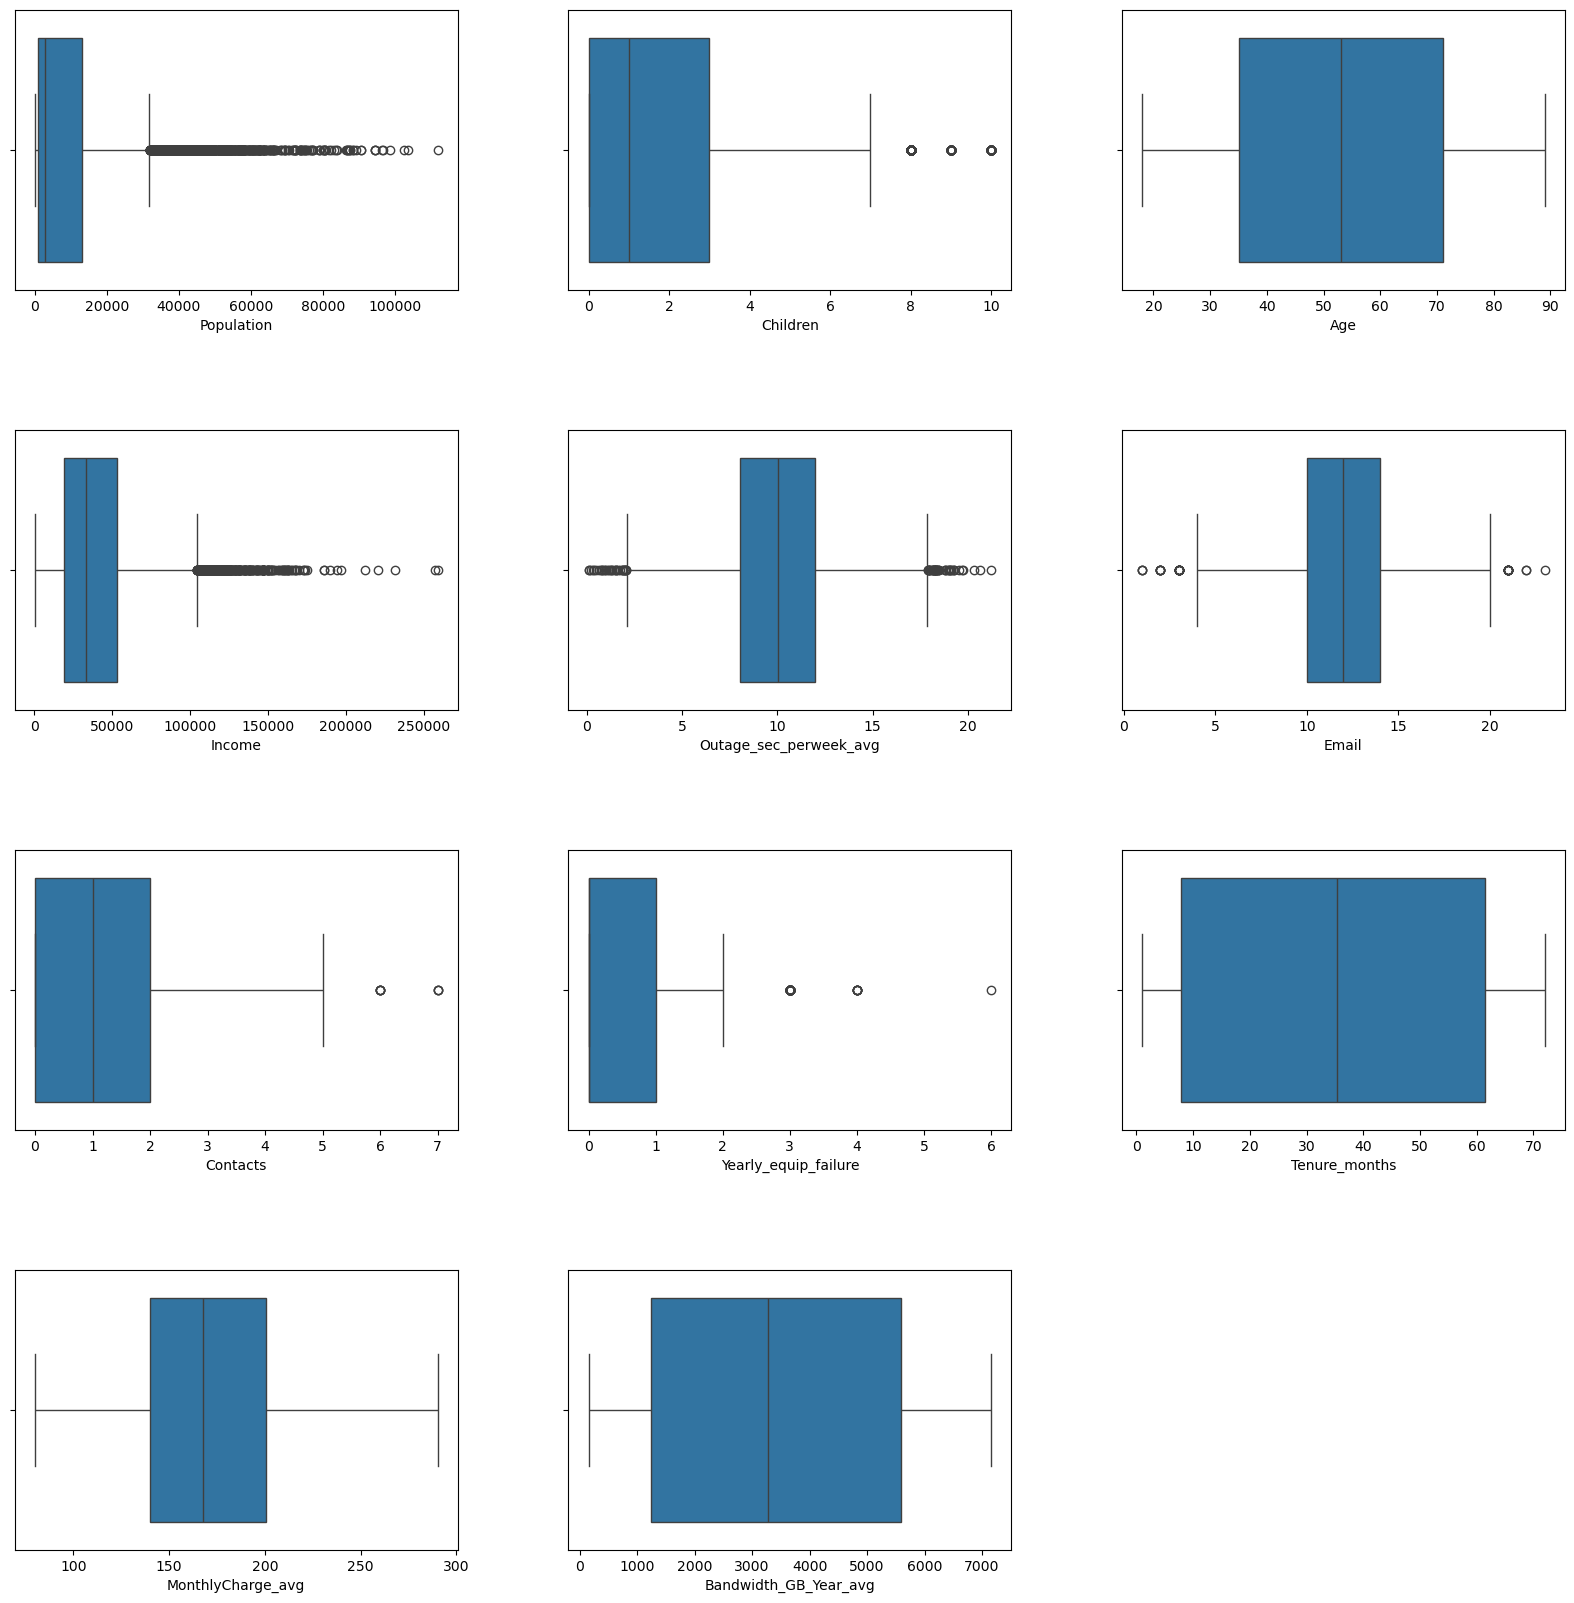

In [18]:
cont_var = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek_avg', 'Email', 'Contacts', 
            'Yearly_equip_failure', 'Tenure_months', 'MonthlyCharge_avg', 'Bandwidth_GB_Year_avg']

# Set figure options
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.subplots_adjust(hspace=.5, wspace=.25)

# For loop over list of variables to generate box plots
for var, ax in zip(cont_var, axes.flat):
    ax.set_label(var)
    sns.boxplot(data=df, x=var, ax=ax)
    
axes[3,2].remove() # Removes unused chart
# Show figure
plt.show()

### Outlier Observations

Out of the quantitative variables, we see outliers across Population, Children, Income, Outage_sec_perweek, Email, Contacts, and Yearly_equip_failure. We could look at the outliers and evaluate the values to see if they are realistic or in need of imputation.

## Population Outliers

In [21]:
# Gets Q1 and Q3 values 
q1, q3 = np.percentile(df['Population'], [25, 75])

# Calculate interquartile range
iqr = q3 - q1

# Calculate upper limit
upper = q3 + (1.5 * iqr)
print('Upper Limit:', upper)

# Set variable for count
upper_count = 0

# Count outliers in Population
for x in df['Population']:
    if x > upper: 
        upper_count += 1

print('Upper Outliers:', upper_count)

pop_range = df['Population'].max() - upper
print('Upper Outlier Range:', pop_range)
print(df['Population'].describe())

# We are going to keep this because cities throughout the united states have a wide variance in population. 

Upper Limit: 31813.0
Upper Outliers: 937
Upper Outlier Range: 80037.0
count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64


Population outliers contains realistic population sizes based on high density urban areas. Since population is not a demographic data point or customer-company interaction, this would not be included as an explanatory variable anyway.

### Children Outliers 

In [24]:
# Gets Q1 and Q3 values 
q1, q3 = np.percentile(df['Children'], [25, 75])

# Calculate interquartile range
iqr = q3 - q1

# Calculate upper limit
upper = q3 + (1.5 * iqr)
print('Upper Limit:', upper)

# Set variable for count
upper_count = 0

# Count outliers in Children
for x in df['Children']:
    if x > upper: 
        upper_count += 1

print('Upper Outliers:', upper_count)

child_range = df['Children'].max() - upper
print('Upper Outlier Range:', child_range)
print(df['Children'].describe())


Upper Limit: 7.5
Upper Outliers: 401
Upper Outlier Range: 2.5
count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64


401 of the customers (~ 4%) have 7 or more children. It's uncommon to have a lot of children, but it is also not impossible. I would say we will keep the outliers here because the number of customers with that many children can still be deemed realistic. 'Children' will stay the same.

### Age Outliers

In [27]:
# Check age range by looking at minimum and maximum; do they make sense?
print('Minimum age:{}'.format(df['Age'].min()))
print('Maximum age: {}'.format(df['Age'].max()))
print(df['Age'].describe())

Minimum age:18
Maximum age: 89
count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


Age minimum and maximum is realistic.

### Income Outliers

In [30]:
# Gets Q1 and Q3 values 
q1, q3 = np.percentile(df['Income'], [25, 75])

# Calculate interquartile range
iqr = q3 - q1

# Calculate upper limit
upper = q3 + (1.5 * iqr)
print('Upper Limit:', upper)

# Set variable for count
upper_count = 0
lower_count = 0

# Count outliers in Income
for x in df['Income']:
    if x > upper: 
        upper_count += 1

print('Upper Outliers:', upper_count)

income_range = df['Income'].max() - upper
print('Upper Outlier Range:', income_range)
print(df['Income'].describe())

Upper Limit: 104278.34875
Upper Outliers: 336
Upper Outlier Range: 154622.35125
count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64


Income outliers could be realistic since maximum is 258K. It's not unheard of that someone could be earning that much and it makes sense that the majority would not be earning over 100K. We will keep income.

### Contact Outliers

In [33]:
# Gets Q1 and Q3 values 
q1, q3 = np.percentile(df['Contacts'], [25, 75])

# Calculate interquartile range
iqr = q3 - q1

# Calculate upper limit
upper = q3 + (1.5 * iqr)
print('Upper Limit:', upper)

# Set variable for count
upper_count = 0

# Count outliers in Contact
for x in df['Contacts']:
    if x > upper: 
        upper_count += 1

print('Upper Outliers:', upper_count)

contact_range = df['Contacts'].max() - upper
print('Upper Outlier Range:', contact_range)
print(df['Contacts'].describe())


Upper Limit: 5.0
Upper Outliers: 8
Upper Outlier Range: 2.0
count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64


Contacts are the number of times customer has contacted the company and the maximum contact value is 7. The dictionary does not specify contacts frequency (monthly, quarterly, yearly or length of entire membership). We could leave this here as unchanged and perhaps reconsider adding to the model since the definition is not accurate.

### Yearly_equip_failure Outliers & Approach

In [36]:
# Gets Q1 and Q3 values 
q1, q3 = np.percentile(df['Yearly_equip_failure'], [25, 75])

# Calculate interquartile range
iqr = q3 - q1

# Calculate upper limit
upper = q3 + (1.5 * iqr)
print('Upper Limit:', upper)

# Set variable for count
upper_count = 0

# Count outliers in Equipment Failure
for x in df['Yearly_equip_failure']:
    if x > upper: 
        upper_count += 1


print('Upper Outliers:', upper_count)

fail_range = df['Yearly_equip_failure'].max() - upper
print('Upper Outlier Range:', fail_range)
print(df['Yearly_equip_failure'].describe())

Upper Limit: 2.5
Upper Outliers: 94
Upper Outlier Range: 3.5
count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64


Yearly equipment failure outliers consists of only about 1% of the population in dataset. Additionally, the maximum value of 6 or once every two months, is a realistic number than can help in determining if this is an issue that could be related to churn. Let's keep yearly equipment failure unchanged.

### Outage Per Week Outliers & Approach

In [39]:
# Calculate upper limit outliers only
# Gets Q1 and Q3 values 
q1, q3 = np.percentile(df['Outage_sec_perweek_avg'], [25, 75])

# Calculate interquartile range
iqr = q3 - q1

# Calculate upper limit
upper = q3 + (1.5 * iqr)
print('Upper Limit:', upper)

# Set variable for count
upper_count = 0

# Count outliers in Outages
for x in df['Outage_sec_perweek_avg']:
    if x > upper: 
        upper_count += 1

print('Upper Outliers:', upper_count)

outage_range_high = df['Outage_sec_perweek_avg'].max() - upper

print('Upper Outlier Range:', outage_range_high)
print(df['Outage_sec_perweek_avg'].describe())

Upper Limit: 17.8963915
Upper Outliers: 43
Upper Outlier Range: 3.310838499999999
count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek_avg, dtype: float64


Maximum value of outage seconds seem realistic at an average of 21 seconds. We will keep this unchanged.

### Email Outliers


In [42]:
# Gets Q1 and Q3 values 
q1, q3 = np.percentile(df['Email'], [25, 75])

# Calculate interquartile range
iqr = q3 - q1

# Calculate lower limit
lower = q1 - (1.5 * iqr)

# Calculate upper limit
upper = q3 + (1.5 * iqr)

# Set variable for count
upper_count = 0
lower_count = 0

# Count outliers in Email
for x in df['Email']:
    if x > upper: 
        upper_count += 1
    if x < lower:
        lower_count += 1

print( 'Lower Outliers:', lower_count, 'Upper Outliers:', upper_count)

email_range_low = lower - df['Email'].min()
email_range_high = df['Email'].max() - upper

print('Lower Outlier Range:', email_range_low, 'Upper Outlier Range:', email_range_high)
print(df['Email'].describe())


Lower Outliers: 23 Upper Outliers: 15
Lower Outlier Range: 3.0 Upper Outlier Range: 3.0
count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64


This is email sent by telecommunications company to the customer in a year and the max value averages about twice a months. Given this includes marketing and correspondence, the max makes sense. The minimum also makes sense because these values could be recorded based on emails sent to customers who recently signed up. Less time as a customer could mean less email received.

### Tenure Range

In [45]:
# Check tenure min and max to see if they make sense
print('Minimum tenure (months):{}'.format(df['Tenure_months'].min()))
print('Maximum tenure (months): {}'.format(df['Tenure_months'].max()))
print(df['Tenure_months'].describe())

Minimum tenure (months):1.00025934
Maximum tenure (months): 71.99928
count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure_months, dtype: float64


### MonthlyCharge Range

In [47]:
# Check monthly charges 
print('Minimum monthly charge:{}'.format(df['MonthlyCharge_avg'].min()))
print('Maximum monthly charge: {}'.format(df['MonthlyCharge_avg'].max()))
print(df['MonthlyCharge_avg'].describe())

Minimum monthly charge:79.97886
Maximum monthly charge: 290.160419
count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge_avg, dtype: float64


### Bandwidth GB Year Range

In [49]:
# Check usage
print('Minimum bandwidth (yearly):{}'.format(df['Bandwidth_GB_Year_avg'].min()))
print('Maximum bandwidth (yearly): {}'.format(df['Bandwidth_GB_Year_avg'].max()))
print(df['Bandwidth_GB_Year_avg'].describe())

Minimum bandwidth (yearly):155.5067148
Maximum bandwidth (yearly): 7158.98153
count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year_avg, dtype: float64


Selected Response Variable: 
- 'Churn'

Selected Predictor Variables:
 - Area
 - Age
 - Gender
 - Children
 - Outage_sec_perweek_avg
 - Contacts
 - Yearly_equip_failure
 - ContractType
 - Port_modem
 - Tablet
 - InternetServiceType
 - MultipleLines
 - OnlineSecurity
 - OnlineBackup
 - DeviceProtection
 - TechSupport
 - StreamingMovies
 - Tenure_months
 - MonthlyCharge_avg
 - Bandwidth_GB_Year_avg


# Establish DataFrame for Model

In [52]:
model_vars = ['Area', 'Churn', 'Age', 'Gender', 'Income', 'Children', 'Outage_sec_perweek_avg',
              'Contacts', 'Yearly_equip_failure', 'ContractType', 'Port_modem', 'Tablet',
              'InternetServiceType', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Tenure_months', 
              'MonthlyCharge_avg', 'Bandwidth_GB_Year_avg']

df = df[model_vars]

df.head()

,Area,Churn,Age,Gender,Income,Children,Outage_sec_perweek_avg,Contacts,Yearly_equip_failure,ContractType,Port_modem,Tablet,InternetServiceType,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Tenure_months,MonthlyCharge_avg,Bandwidth_GB_Year_avg
0,Urban,No,68,Male,28561.99,0,7.978323,0,1,One year,Yes,Yes,Fiber Optic,No,Yes,Yes,No,No,Yes,6.795513,172.455519,904.536110
1,Urban,Yes,27,Female,21704.77,1,11.699080,0,1,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,No,No,No,Yes,1.156681,242.632554,800.982766
2,Urban,No,50,Female,9609.57,4,10.752800,0,1,Two Year,Yes,No,DSL,Yes,No,No,No,No,Yes,15.754144,159.947583,2054.706961
3,Suburban,No,48,Male,18925.23,1,14.913540,2,0,Two Year,No,No,DSL,No,Yes,No,No,No,No,17.087227,119.956840,2164.579412
4,Suburban,Yes,83,Male,40074.19,0,8.147417,2,1,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,Yes,No,1.670972,149.948316,271.493436


# Summary Statistics

## Summary Statistics - Response Variable

In [55]:
## Dependent Variable Summary Statistics
print(df[['Churn']].describe())
counts = df['Churn'].value_counts()
   
percs = df['Churn'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

print(pd.concat([counts,percs], axis=1, keys=['count', 'percentage']))

        Churn
count   10000
unique      2
top        No
freq     7350
       count percentage
Churn                  
No      7350      73.5%
Yes     2650      26.5%


## Summary Statistics - Numeric Explanatory Variables

In [57]:
numeric_vars = ['Age', 'Income', 'Children', 'Outage_sec_perweek_avg', 
    'Contacts', 'Yearly_equip_failure', 'Tenure_months', 
    'MonthlyCharge_avg', 'Bandwidth_GB_Year_avg']

df[numeric_vars].describe()

,Age,Income,Children,Outage_sec_perweek_avg,Contacts,Yearly_equip_failure,Tenure_months,MonthlyCharge_avg,Bandwidth_GB_Year_avg
count,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.078400,39806.926771,2.0877,10.001848,0.994200,0.398000,34.526188,172.624816,3392.341550
std,20.698882,28199.916702,2.1472,2.976019,0.988466,0.635953,26.443063,42.943094,2185.294852
min,18.000000,348.670000,0.0000,0.099747,0.000000,0.000000,1.000259,79.978860,155.506715
25%,35.000000,19224.717500,0.0000,8.018214,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,53.000000,33170.605000,1.0000,10.018560,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,71.000000,53246.170000,3.0000,11.969485,2.000000,1.000000,61.479795,200.734725,5586.141370
max,89.000000,258900.700000,10.0000,21.207230,7.000000,6.000000,71.999280,290.160419,7158.981530


## Summary Statistic - Categorical Variables

In [59]:
cat_var = ['Area', 'Gender', 'ContractType', 'Port_modem', 'Tablet', 'InternetServiceType',
           'MultipleLines', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 
           'StreamingMovies']

df[cat_var].describe()

,Area,Gender,ContractType,Port_modem,Tablet,InternetServiceType,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,3,3,2,2,3,2,2,2,2,2,2
top,Suburban,Female,Month-to-month,No,No,Fiber Optic,No,No,No,No,No,No
freq,3346,5025,5456,5166,7009,4408,5392,6424,5494,5614,6250,5110


In [60]:
# Counts and Percentages
for col in df[cat_var]:
    counts = df[col].value_counts()
    
    # Generate percentages of categories of explanatory variables
    percs = df[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

    print("\n")
    print(pd.concat([counts,percs], axis=1, keys=['count', 'percentage']))



          count percentage
Area                      
Suburban   3346      33.5%
Urban      3327      33.3%
Rural      3327      33.3%


           count percentage
Gender                     
Female      5025      50.2%
Male        4744      47.4%
Nonbinary    231       2.3%


                count percentage
ContractType                    
Month-to-month   5456      54.6%
Two Year         2442      24.4%
One year         2102      21.0%


            count percentage
Port_modem                  
No           5166      51.7%
Yes          4834      48.3%


        count percentage
Tablet                  
No       7009      70.1%
Yes      2991      29.9%


                     count percentage
InternetServiceType                  
Fiber Optic           4408      44.1%
DSL                   3463      34.6%
None                  2129      21.3%


               count percentage
MultipleLines                  
No              5392      53.9%
Yes             4608      46.1%


          

# Univariate and Bivariate Visualizations

## Univariate Visualization for Dependent | Response Variable

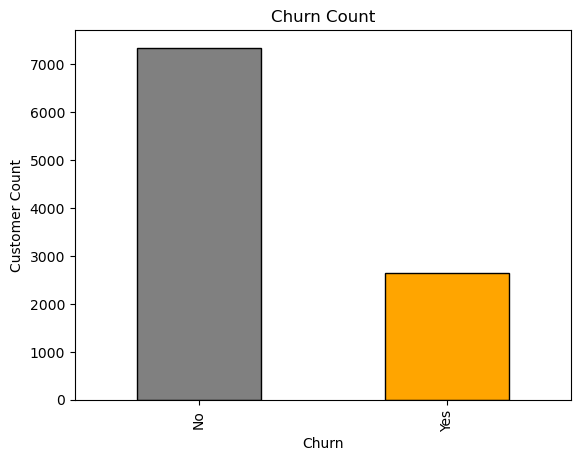

In [63]:
churn_count = df['Churn'].value_counts()

ax = churn_count.plot(kind='bar', color=['gray', 'orange'], edgecolor='black')
ax.set_ylabel('Customer Count')
ax.set_title('Churn Count')

plt.show()

## Univariate Bivariate Visualizations for Selected Continuous Variables

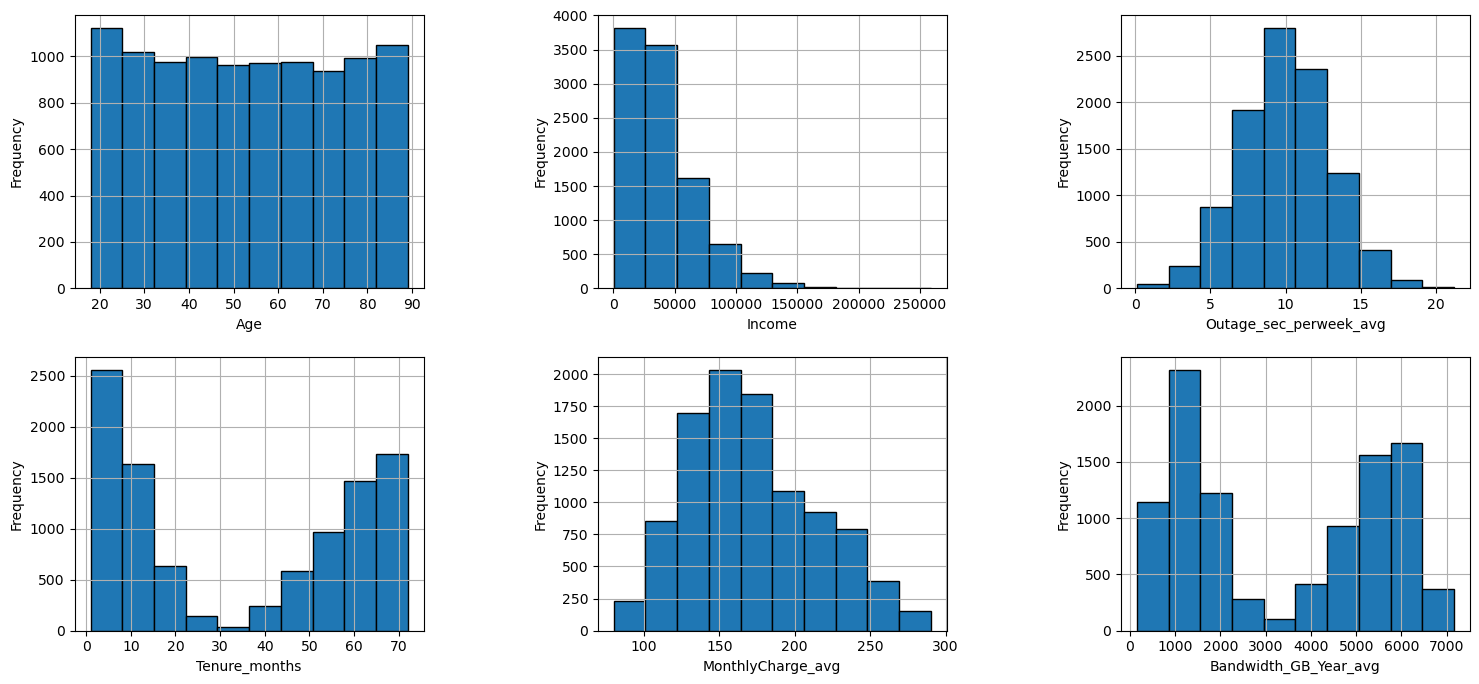

In [65]:
# Histograms for continuous variables

# Establish target continuous variables
cont_var = ['Age', 'Income','Outage_sec_perweek_avg', 'Tenure_months', 'MonthlyCharge_avg', 'Bandwidth_GB_Year_avg']


# Loop over list of variables to generate histograms
fig, (axes) = plt.subplots(2, 3, figsize=(18, 8))
fig.subplots_adjust(hspace= .25, wspace=.5)

for var, ax in zip(cont_var, axes.flat):
    ax.set_ylabel('Frequency')
    ax.set_xlabel(var)
    
    df[var].hist(ax=ax, edgecolor='black')

plt.show()

## Bivariate Continuous Variables Against Churn Variable

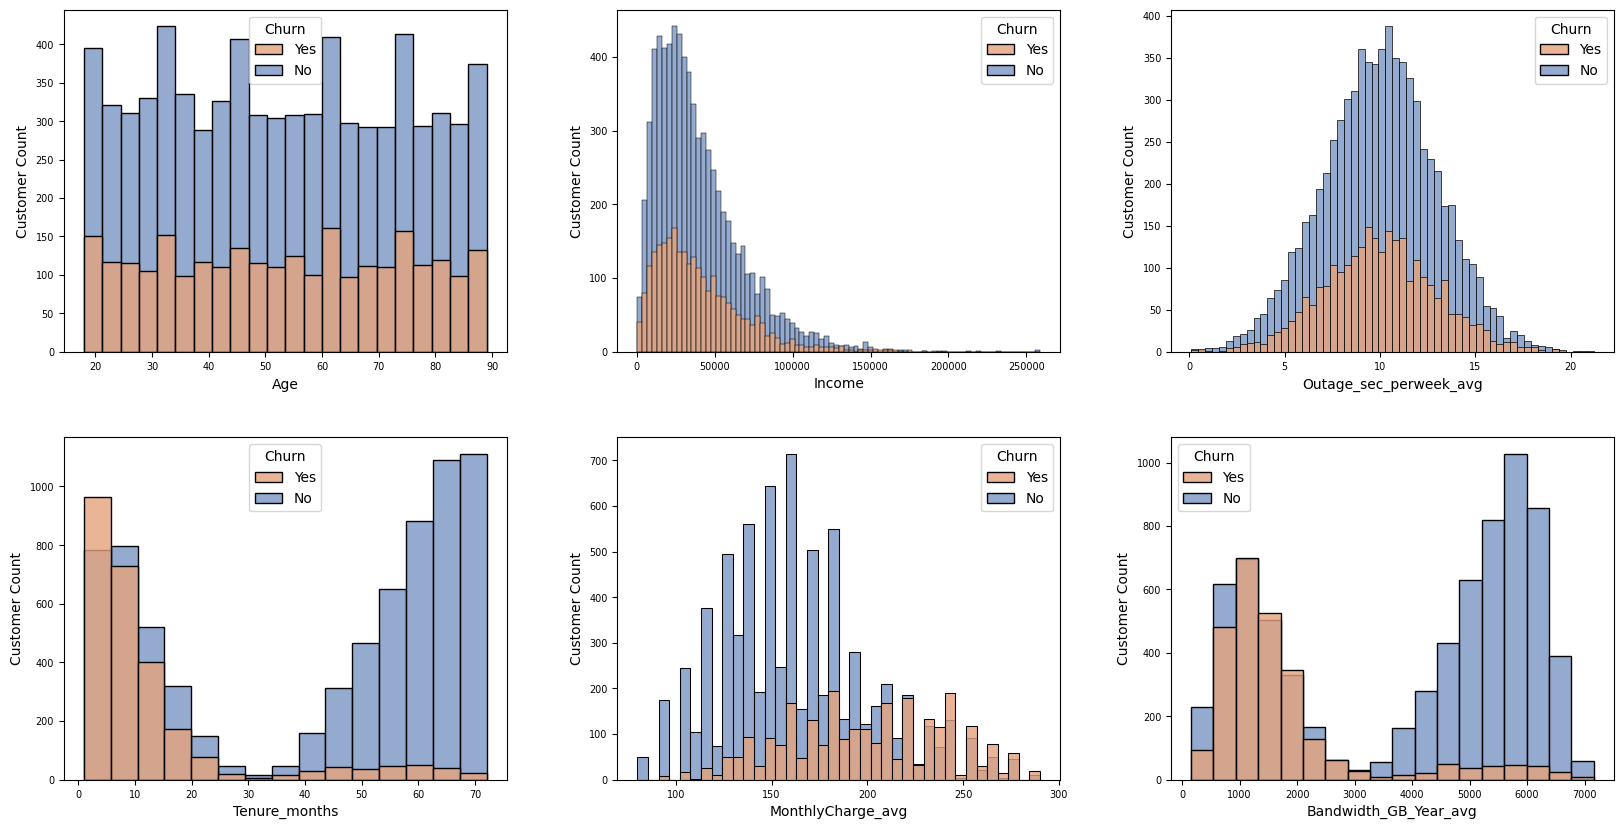

In [67]:
# Set figure options
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=.25, wspace=.25)

# For loop over list of variables to generate box plots
for var, ax in zip(cont_var, axes.flat):
    ax.set_ylabel('Customer Count')
    ax.set_label(var)
   
    # Create overlapping hisplot
    sns.histplot(data=df, x=var, hue='Churn', ax=ax, hue_order=["Yes", "No"], 
                palette={'Yes': '#e5a37d', 'No': '#7995c4'}, alpha=.8)
    
    ax.tick_params(labelsize=7)
    
# Show figure
plt.show()


## Univariate for Discrete

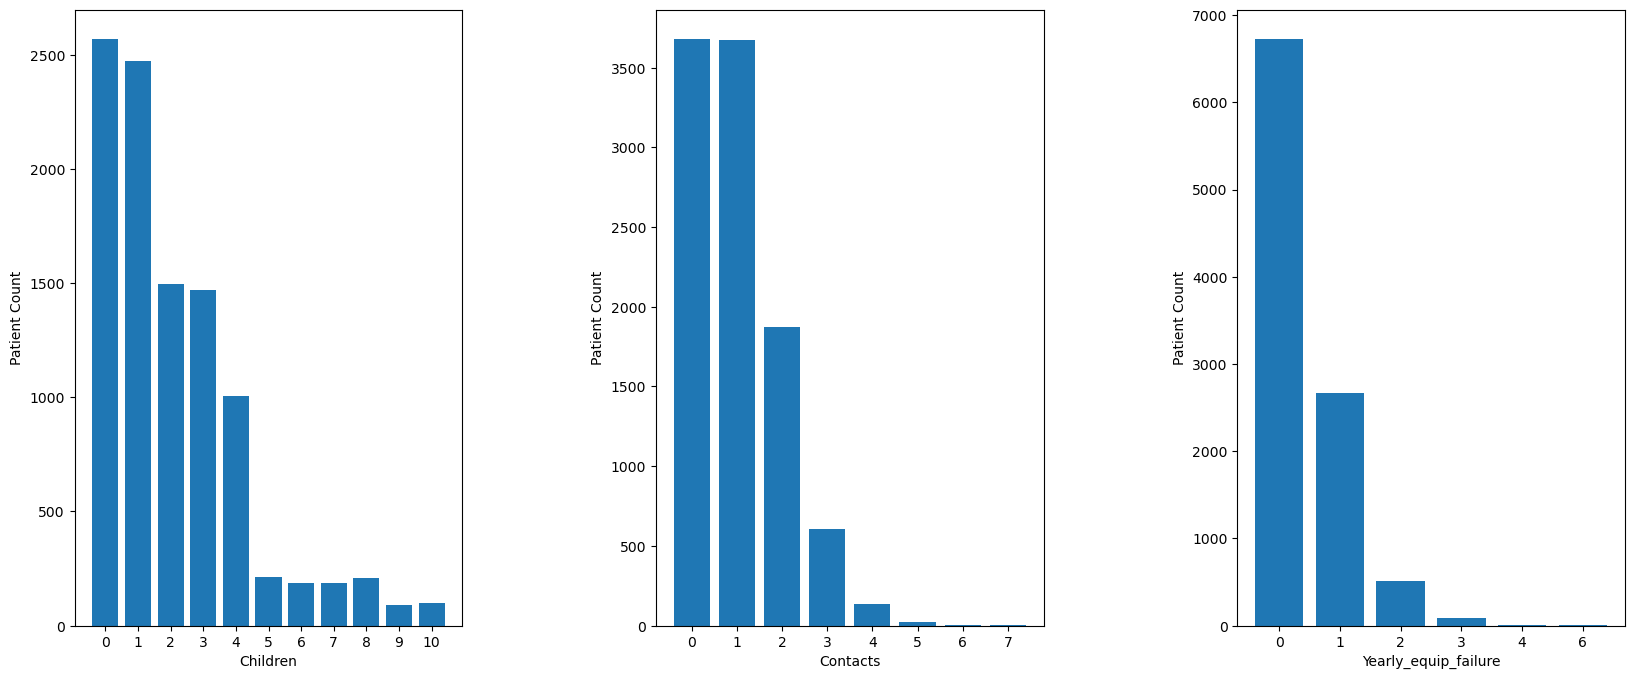

In [69]:
# Establish target discrete variables
discrete_var = ['Children', 'Contacts', 'Yearly_equip_failure']

fig, (axes) = plt.subplots(1, 3, figsize=(20, 8))
fig.subplots_adjust(hspace=.25, wspace=.5)

# Loop over list of variables to generate histograms
for var, ax in zip(discrete_var, axes.flat):
    temp_dict = df[var].value_counts().sort_index().to_dict()
    names = list(temp_dict.keys())
    values = list(temp_dict.values())

    ax.set_ylabel('Patient Count')
    ax.set_xlabel(var)
    
    ax.bar(range(len(temp_dict)), values, tick_label=names)


plt.show()

## Bivariate Discrete Against Churn Variable


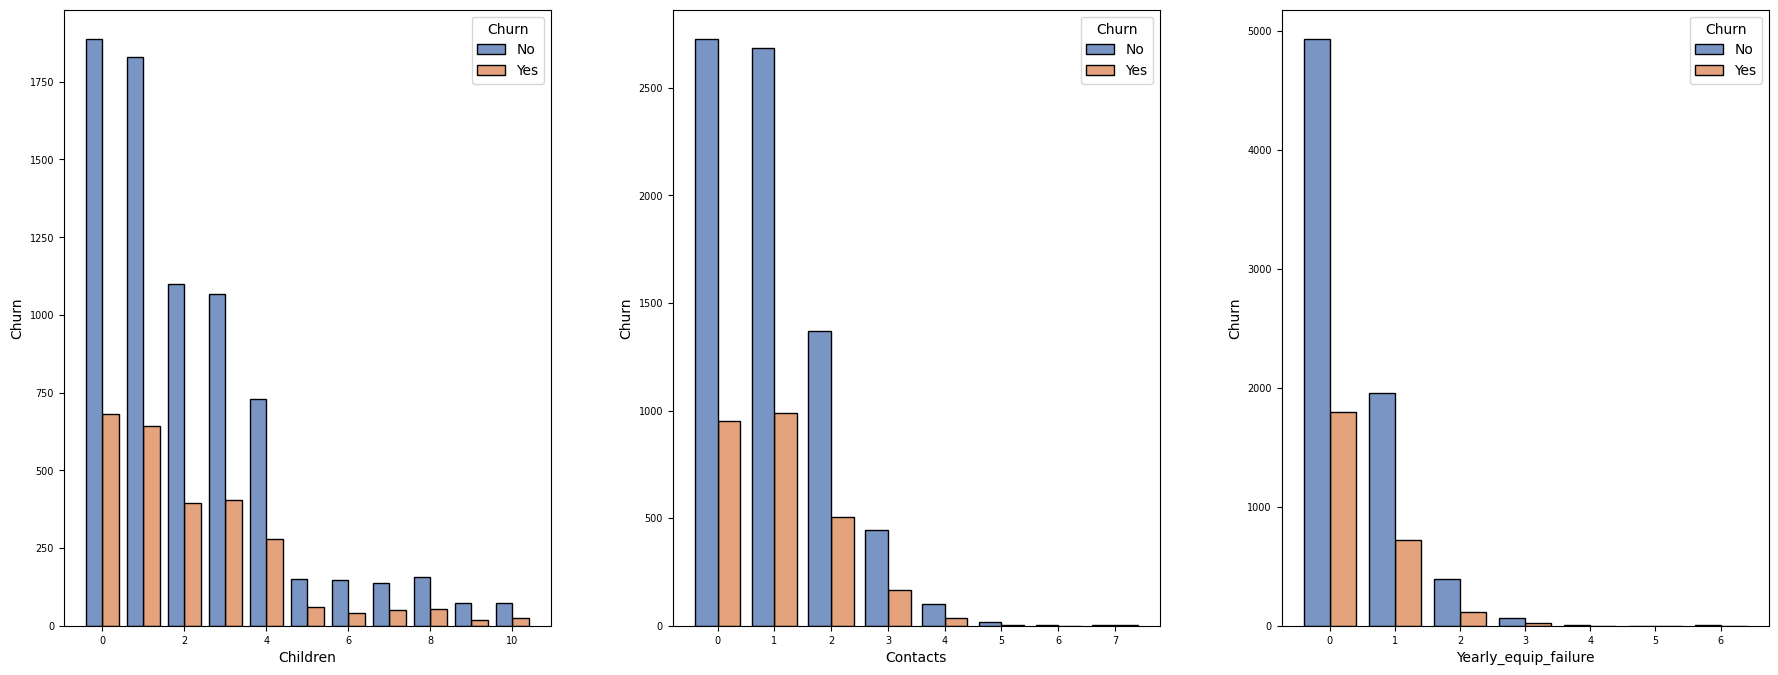

In [71]:
# Set figure options
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.subplots_adjust(hspace=.25, wspace=.25)

# For loop over list of variables to generate box plots
for var, ax in zip(discrete_var, axes.flat):
    ax.set_ylabel('Churn')
    ax.set_label(var)
   
    
    sns.histplot(data=df, x=var, hue='Churn', ax=ax,
                multiple="dodge", discrete=True, shrink=.8,
                palette={'Yes': '#e5a37d', 'No': '#7995c4'}, alpha=1)
    ax.tick_params(labelsize=7)
    
# Show figure
plt.show()


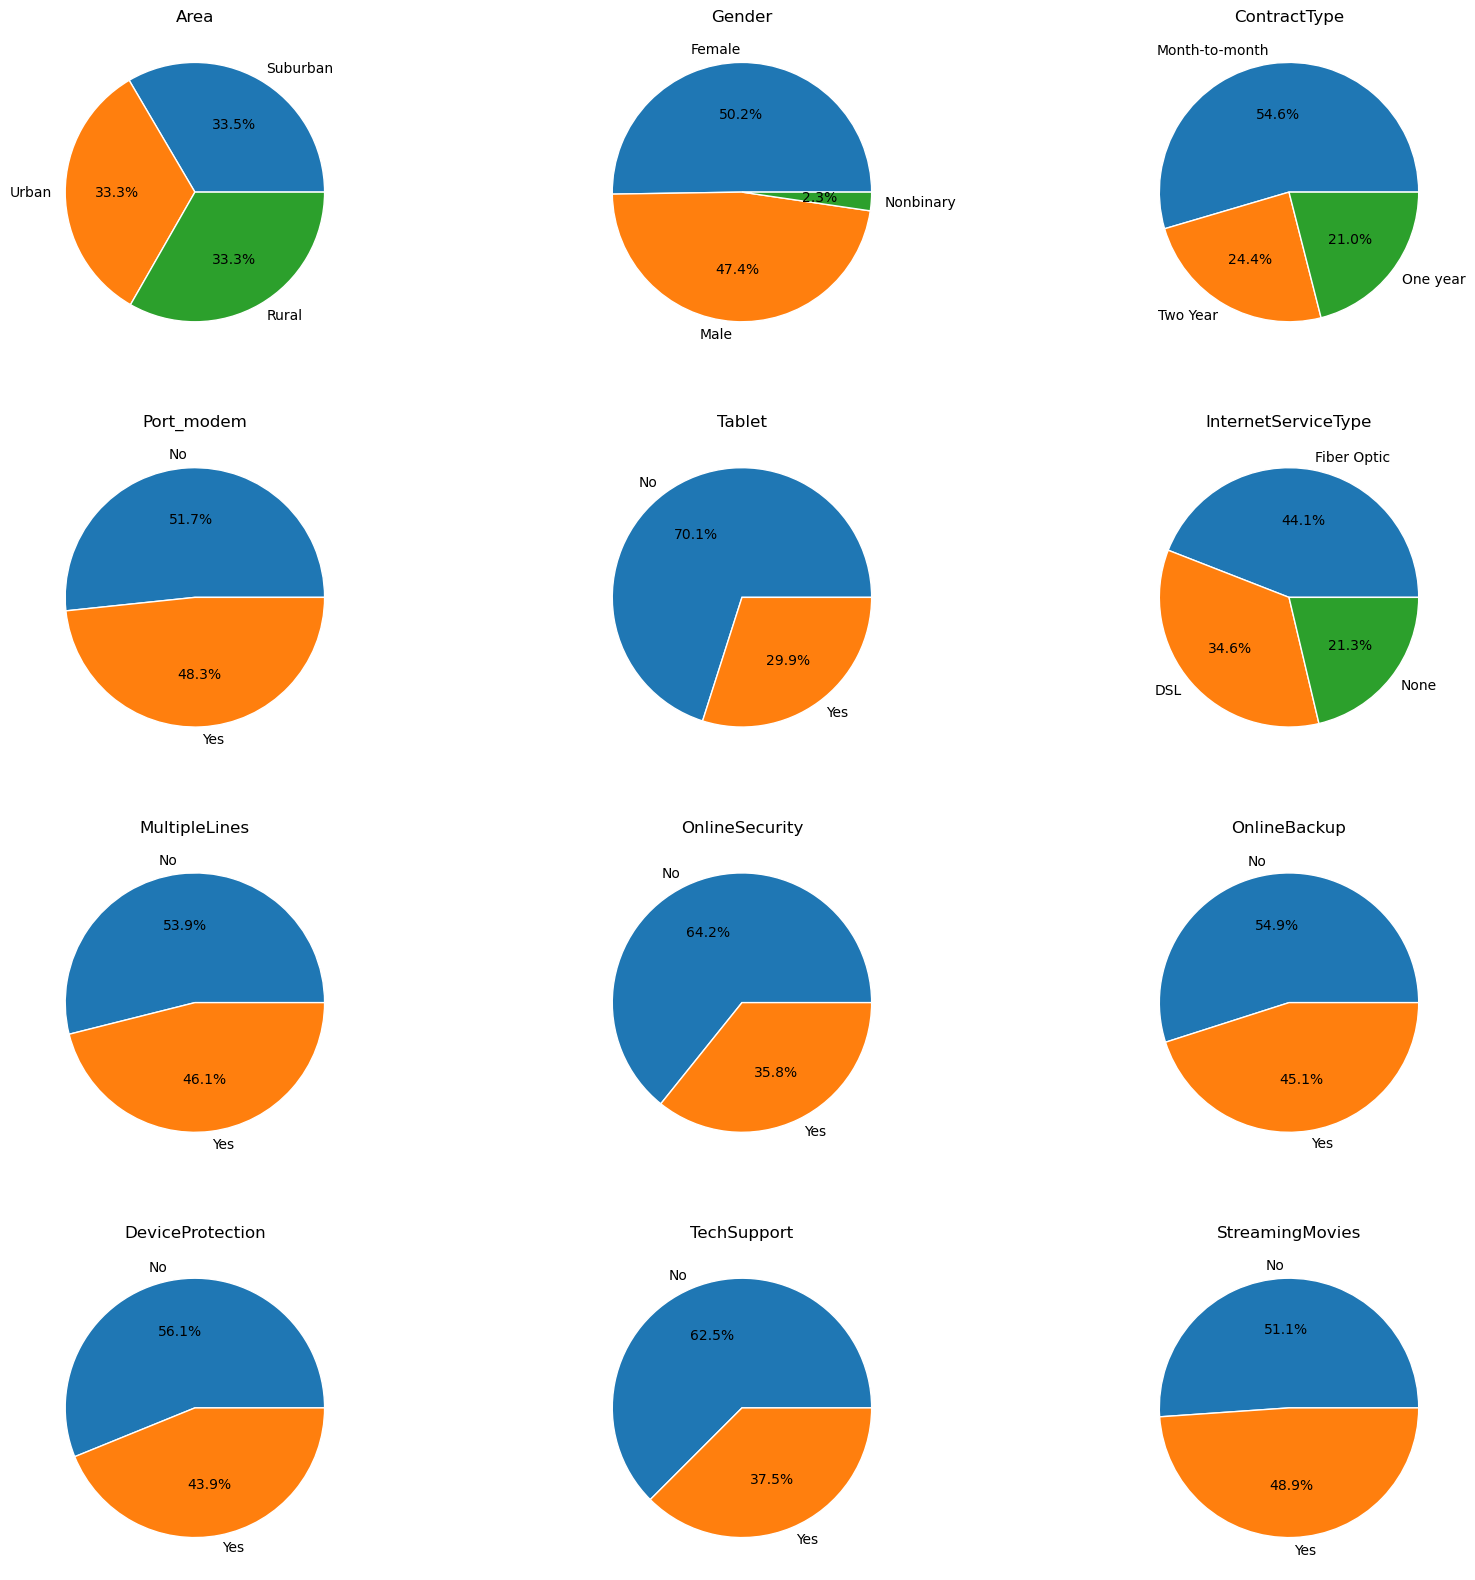

In [72]:
# Univariate for Categorical; By Percentage Frequency

# Establish figure and axes
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.subplots_adjust(hspace=.25)

# Loop over list of variables to generate pie charts
for var, ax in zip(cat_var, axes.flat):
    labels = df[var].value_counts().index.tolist()
    count = df[var].value_counts().values.tolist()
    
    ax.set_title(var)
    
    ax.pie(count, 
           labels=labels, 
           autopct='%1.1f%%', 
           wedgeprops = {"edgecolor" : "white", 
                          'linewidth': 1})
    
plt.show()


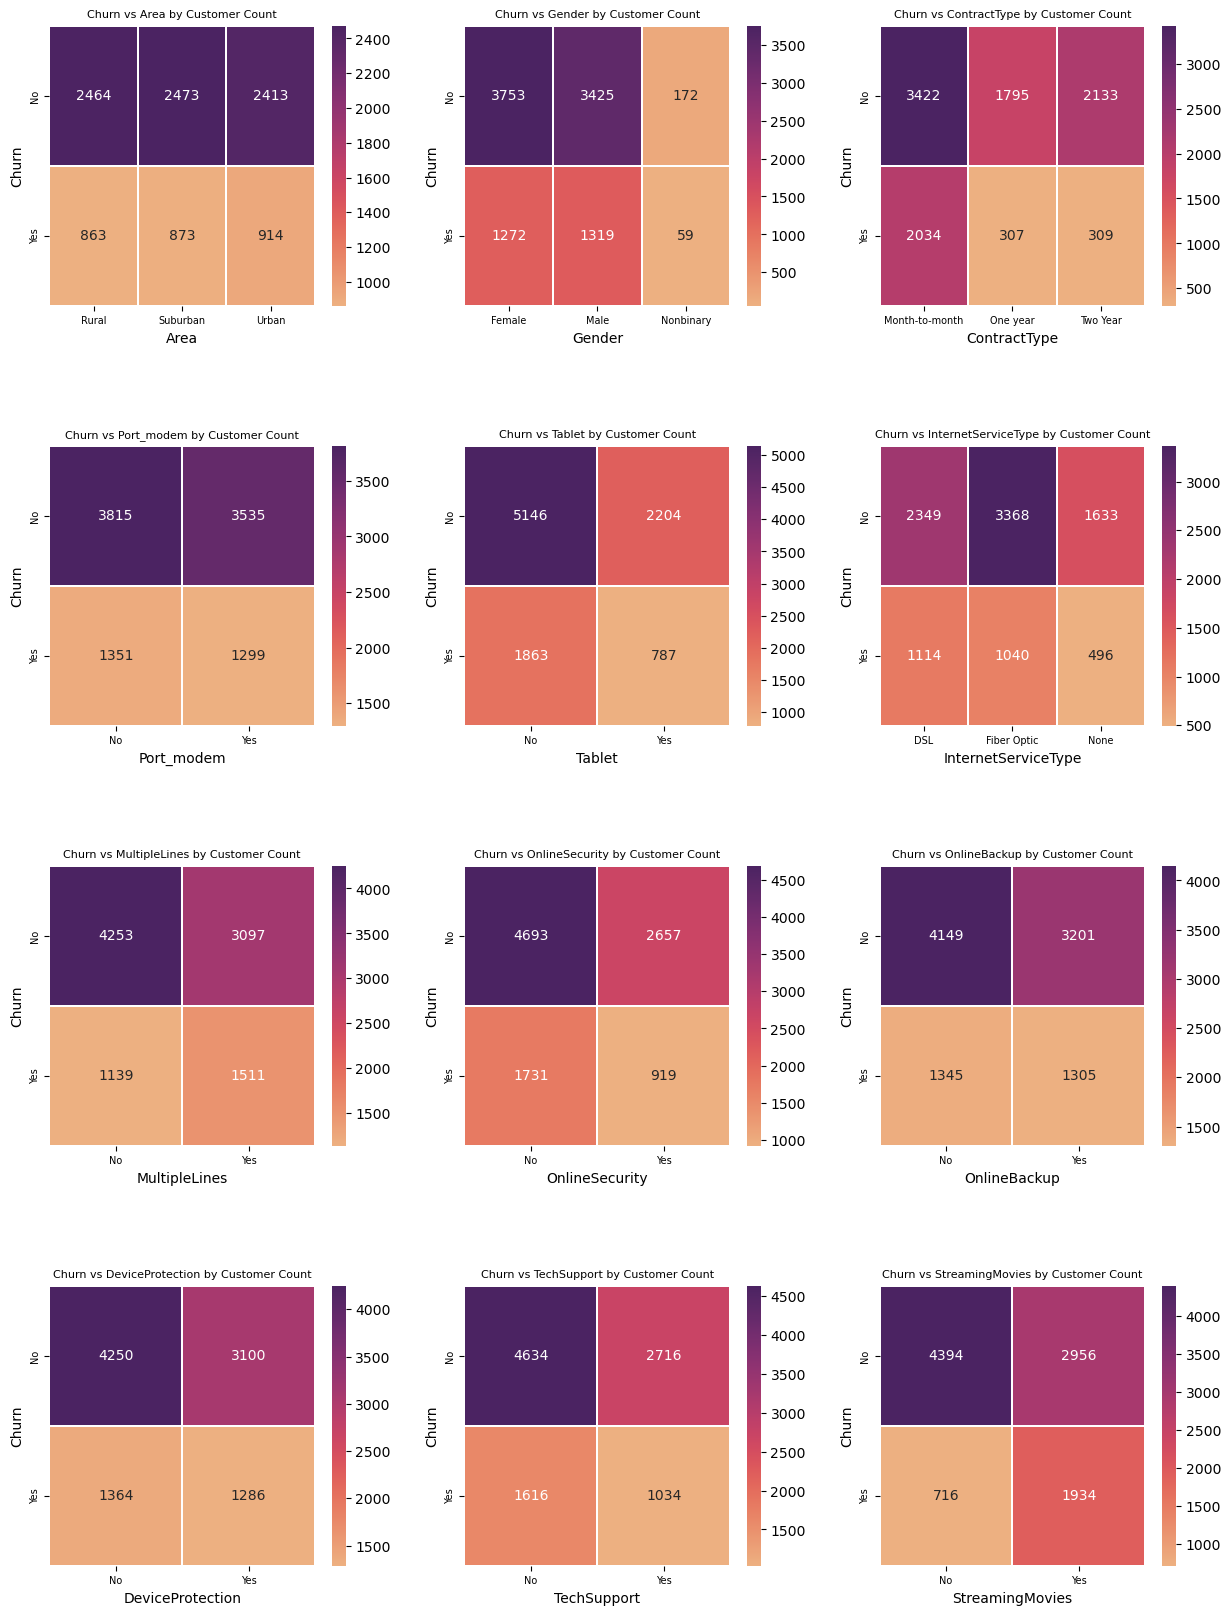

In [73]:
# Bivariate for categorical variables 

# Set figure options
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=.5, wspace=.25)

# For loop over list of variables to generate box plots
for var, ax in zip(cat_var, axes.flat):
    
    # Create a cross table to we can create the heatmap and do comparisons
    cross_table = pd.crosstab(df['Churn'], df[var])

    ax.set_ylabel('Customer Count')
    ax.set_title('Churn vs {} by Customer Count'.format(var), fontsize=8)
    
    # Heatmap using the cross table
    sns.heatmap(cross_table, cmap="flare", annot=True, ax=ax, fmt='.0f', 
               linewidths=0.2, linecolor='white')
    
    ax.tick_params(labelsize=7)
    
# Show figure
plt.show()
# print(table_list)

# Data Wrangling

## Re-expression of Categorical Variables

In [76]:
# Establish list of variables for categorical re-expression
reexp_cols = ['Churn', 'Port_modem', 'Tablet', 'MultipleLines', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies']

In [77]:
# New column names variable
new_col_list = [] 

# Function for looping through target columns to re-express 'Yes/No' to 1/0
for col in reexp_cols:
    # Make new name and duplicate original column
    new_col = col +'_numeric'
    df[new_col] = df[col]
    
    # Make dictionary to change boolean to numeric
    new_dict = {new_col: {'No': 0, 'Yes': 1}}
    
    # Change all values in duplicated columns to ordinal encoding
    df.replace(new_dict, inplace=True)
    
    # Add to new_col_list
    new_col_list.append(new_col)

# Check that numeric columns were created by filtering and printing them

numeric_cols = [var for var in df.columns if 'numeric' in var]
print(df[numeric_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Churn_numeric             10000 non-null  int64
 1   Port_modem_numeric        10000 non-null  int64
 2   Tablet_numeric            10000 non-null  int64
 3   MultipleLines_numeric     10000 non-null  int64
 4   OnlineSecurity_numeric    10000 non-null  int64
 5   OnlineBackup_numeric      10000 non-null  int64
 6   DeviceProtection_numeric  10000 non-null  int64
 7   TechSupport_numeric       10000 non-null  int64
 8   StreamingMovies_numeric   10000 non-null  int64
dtypes: int64(9)
memory usage: 703.3 KB
None


In [78]:
# Show unique values in new_col_list
for col in new_col_list:
    print(col, df[col].unique())

Churn_numeric [0 1]
Port_modem_numeric [1 0]
Tablet_numeric [1 0]
MultipleLines_numeric [0 1]
OnlineSecurity_numeric [1 0]
OnlineBackup_numeric [1 0]
DeviceProtection_numeric [0 1]
TechSupport_numeric [0 1]
StreamingMovies_numeric [1 0]


## One Hot Encoding; Get Dummy Variables

In [80]:
# Establish selection for dummy variable creation
target_dummy_vars = ['Area', 'Gender', 'ContractType', 'InternetServiceType']
# Create dummy variables and drop one level to remove redundancy
dummies = pd.get_dummies(df[target_dummy_vars], prefix=target_dummy_vars, drop_first=True, dtype=int)

dummies.head()

,Area_Suburban,Area_Urban,Gender_Male,Gender_Nonbinary,ContractType_One year,ContractType_Two Year,InternetServiceType_Fiber Optic,InternetServiceType_None
0,0,1,1,0,1,0,1,0
1,0,1,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0
3,1,0,1,0,0,1,0,0
4,1,0,1,0,0,0,1,0


In [81]:
# Add dummies columns to df and make change permanent by reassigning df
df = pd.concat([df, dummies], axis=1)

In [82]:
# Create array for generated dummy variables and check that they made it to the dataframe
dummy_vars = ['Area_Suburban', 'Area_Urban', 'Gender_Male', 'Gender_Nonbinary', 'ContractType_One year',
             'ContractType_Two Year', 'InternetServiceType_Fiber Optic', 'InternetServiceType_None']

print(df[dummy_vars].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Area_Suburban                    10000 non-null  int64
 1   Area_Urban                       10000 non-null  int64
 2   Gender_Male                      10000 non-null  int64
 3   Gender_Nonbinary                 10000 non-null  int64
 4   ContractType_One year            10000 non-null  int64
 5   ContractType_Two Year            10000 non-null  int64
 6   InternetServiceType_Fiber Optic  10000 non-null  int64
 7   InternetServiceType_None         10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB
None


In [83]:
# Drop original variables so all we have are the variables we will use for the logistic model

vars_todrop = ['Churn', 'Port_modem', 'Tablet', 'MultipleLines', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies',
               'Area', 'Gender', 'ContractType', 'InternetServiceType']

df.drop(vars_todrop, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              10000 non-null  int64  
 1   Income                           10000 non-null  float64
 2   Children                         10000 non-null  int64  
 3   Outage_sec_perweek_avg           10000 non-null  float64
 4   Contacts                         10000 non-null  int64  
 5   Yearly_equip_failure             10000 non-null  int64  
 6   Tenure_months                    10000 non-null  float64
 7   MonthlyCharge_avg                10000 non-null  float64
 8   Bandwidth_GB_Year_avg            10000 non-null  float64
 9   Churn_numeric                    10000 non-null  int64  
 10  Port_modem_numeric               10000 non-null  int64  
 11  Tablet_numeric                   10000 non-null  int64  
 12  MultipleLines_numer

In [84]:
# Generate csv file for submission
df.to_csv('Cleaned_Wrangled_Logistic_Dataframe.csv')

# Logistic Regression Models

## Initial Model

Generate the first and model to make the initial observations.

In [88]:
# Establish the explanatory columns
expl_list = ['Age', 'Income', 'Children', 'Outage_sec_perweek_avg', 'Contacts',
                'Yearly_equip_failure', 'Tenure_months', 'MonthlyCharge_avg', 'Bandwidth_GB_Year_avg', 'Port_modem_numeric',
                'Tablet_numeric', 'MultipleLines_numeric', 'OnlineSecurity_numeric', 'OnlineBackup_numeric', 'DeviceProtection_numeric',
                'TechSupport_numeric', 'StreamingMovies_numeric', 'Area_Suburban', 'Area_Urban', 'Gender_Male',
                'Gender_Nonbinary', 'ContractType_One year', 'ContractType_Two Year', 'InternetServiceType_Fiber Optic', 'InternetServiceType_None']
              

In [89]:
# Set x and y for model
y = df[['Churn_numeric']]
X = df[expl_list].assign(const=1)

# Generate fitted model
model_A = sm.Logit(y, X).fit()

print(model_A.summary())

Optimization terminated successfully.
         Current function value: 0.226081
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9974
Method:                           MLE   Df Model:                           25
Date:                Fri, 30 Aug 2024   Pseudo R-squ.:                  0.6090
Time:                        14:39:16   Log-Likelihood:                -2260.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Age                                 0.0280      0.006      4.358  

In [90]:
#Print AIC and BIG

print('Model A AIC: {}'.format(model_A.aic))
print('Model A BIC: {}'.format(model_A.bic))

Model A AIC: 4573.611588594536
Model A BIC: 4761.080438265917


We don't get a multicollinearity error but we have some extreme values in the summary. Pause here and we will do a multicollinearity check.

## Addressing Multicollinearity

In [93]:
X = df[expl_list]

# Create dataframe to load variable name and VIF scores
vif_df = pd.DataFrame()

# Create column called feature to list all variables
vif_df["feature"] = X.columns
# Creates column called 'VIF' to list all corresponding VIF scores

vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
 
# vif_df = vif_df.set_index('feature')
print(vif_df)

                            feature           VIF
0                               Age     40.632344
1                            Income      2.924146
2                          Children     12.692895
3            Outage_sec_perweek_avg     10.992270
4                          Contacts      1.998823
5              Yearly_equip_failure      1.390135
6                     Tenure_months  15000.397408
7                 MonthlyCharge_avg   1178.041883
8             Bandwidth_GB_Year_avg  19176.164286
9                Port_modem_numeric      1.921412
10                   Tablet_numeric      1.426376
11            MultipleLines_numeric      8.437863
12           OnlineSecurity_numeric      3.326120
13             OnlineBackup_numeric      2.558282
14         DeviceProtection_numeric      2.108418
15              TechSupport_numeric      3.324224
16          StreamingMovies_numeric      7.073637
17                    Area_Suburban      1.979265
18                       Area_Urban      1.972033


## Reiterative High VIF Removal 
Set the original list of explanatory variable so we remember it. Then do a for loop that searches for the maximum VIF and remove that variable. After removing that variable, loop again to check for any variables that are still above the VIF threshold. Stop the for loop when all VIFs are under 10.

In [95]:
print('First List: {}'.format(expl_list))
print('First List Length: {}'.format(len(expl_list)))

First List: ['Age', 'Income', 'Children', 'Outage_sec_perweek_avg', 'Contacts', 'Yearly_equip_failure', 'Tenure_months', 'MonthlyCharge_avg', 'Bandwidth_GB_Year_avg', 'Port_modem_numeric', 'Tablet_numeric', 'MultipleLines_numeric', 'OnlineSecurity_numeric', 'OnlineBackup_numeric', 'DeviceProtection_numeric', 'TechSupport_numeric', 'StreamingMovies_numeric', 'Area_Suburban', 'Area_Urban', 'Gender_Male', 'Gender_Nonbinary', 'ContractType_One year', 'ContractType_Two Year', 'InternetServiceType_Fiber Optic', 'InternetServiceType_None']
First List Length: 25


In [96]:
# Establish multicollinearity threshold
vif_threshold = 10

# Loop over explanatory list and check over VIFs
for var in expl_list:
    
    # Get max values and details
    max_val = vif_df['VIF'].max()
    max_name = vif_df['feature'][vif_df['VIF'] == max_val].values[0]
    max_index = vif_df['feature'][vif_df['VIF'] == max_val].index[0]
    
    if max_val > vif_threshold: 
        print('Max Variable to Remove {}'.format(max_name))
        
        # Remove large VIF var in explanatory list
        expl_list.remove(max_name)
        X = df[expl_list]
        
        # Create dataframe to load variable name and VIF scores
        vif_df = pd.DataFrame()

        # Create column called feature to list all variables
        vif_df["feature"] = X.columns
        
        # Creates column called 'VIF' to list all corresponding VIF scores
        vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
        print(vif_df)
        
print('New List: {}'.format(expl_list))
print('New List Length {}'.format(len(expl_list)))

Max Variable to Remove Bandwidth_GB_Year_avg
                            feature        VIF
0                               Age   6.744327
1                            Income   2.882687
2                          Children   1.913136
3            Outage_sec_perweek_avg  10.009395
4                          Contacts   1.983514
5              Yearly_equip_failure   1.385622
6                     Tenure_months   2.633943
7                 MonthlyCharge_avg  38.565635
8                Port_modem_numeric   1.907348
9                    Tablet_numeric   1.421261
10            MultipleLines_numeric   2.634451
11           OnlineSecurity_numeric   1.559828
12             OnlineBackup_numeric   2.194206
13         DeviceProtection_numeric   1.913100
14              TechSupport_numeric   1.711834
15          StreamingMovies_numeric   3.839917
16                    Area_Suburban   1.954893
17                       Area_Urban   1.948956
18                      Gender_Male   1.919695
19             

In [97]:
# Re-run model

y = df[['Churn_numeric']]
X = df[expl_list].assign(const=1)

model_B = sm.Logit(y, X).fit()

print(model_B.summary())

Optimization terminated successfully.
         Current function value: 0.295519
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9976
Method:                           MLE   Df Model:                           23
Date:                Fri, 30 Aug 2024   Pseudo R-squ.:                  0.4889
Time:                        14:39:19   Log-Likelihood:                -2955.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Age                                 0.0010      0.002      0.617  

# Model Reduction

## Backward Stepwise Elimination

In [100]:
# Define function for repetitive code 
def pval_df(model):
    pvalues = pd.DataFrame(model.pvalues).reset_index()
    pvalues.columns = ['feature', 'pvalue']
    pvalues.drop(pvalues[pvalues['feature'] == 'const'].index[0], inplace=True)
    return pvalues

In [101]:
# Print first of p-values

pvalues = pval_df(model_B)

print(pvalues)

# Set alpha for significance
alpha = 0.05

# Establish list to update pvalues with
updated_list = []

# Set counter for interation
count = 0

print('Model B before reduction:')
print(model_B.summary())

#Loop over pvalues dataframe

for x in pvalues['pvalue']:
    
    # Find maximum pvalue and its index in the dataframe
    max_pval = pvalues['pvalue'].max()
    max_name = pvalues['feature'][pvalues['pvalue'] == max_pval].values[0]
    max_index = pvalues['feature'][pvalues['pvalue'] == max_pval].index[0]
          
    # If pvalue is larger that 0.05...
    if max_pval > alpha:
        # Print name of variable to remove and add 1 to iteration count
        count += 1
        print('\n Iteration: {}'.format(count))
        print('Variable to Remove: {}'.format(max_name))
        
        # ... we remove it from dataframe
        pvalues.drop(index=max_index, inplace=True)
        
        # change the list to the reduced variables
        updated_list = pvalues['feature'].values
        
        # confirm it's been reduced
        print('\n Length of new list: {} \n'.format(len(updated_list)))
        
        print('Updated Model (without {}):'.format(max_name))
        
        # Re-run the linear regression with new list
        X = df[updated_list].assign(const=1)
        model = sm.Logit(y, X).fit()
        
        #Redo p-values
        pvalues = pval_df(model)
        
        print(model.summary())
        
        

                            feature         pvalue
0                               Age   5.370229e-01
1                            Income   6.218350e-01
2                          Children   3.353646e-01
3            Outage_sec_perweek_avg   9.162039e-01
4                          Contacts   3.317162e-01
5              Yearly_equip_failure   7.860287e-01
6                     Tenure_months   0.000000e+00
7                Port_modem_numeric   1.837103e-01
8                    Tablet_numeric   3.250559e-01
9             MultipleLines_numeric   3.087699e-72
10           OnlineSecurity_numeric   1.089614e-01
11             OnlineBackup_numeric   7.524511e-19
12         DeviceProtection_numeric   8.872852e-09
13              TechSupport_numeric   1.023411e-02
14          StreamingMovies_numeric  1.481220e-236
15                    Area_Suburban   6.588612e-01
16                       Area_Urban   6.865083e-01
17                      Gender_Male   3.618060e-03
18                 Gender_Nonbi

In [102]:
# Update explanatory variable list 
expl_list = ['Tenure_months', 'MultipleLines_numeric', 'OnlineBackup_numeric', 'DeviceProtection_numeric', 'TechSupport_numeric',
             'StreamingMovies_numeric', 'Gender_Male', 'ContractType_One year', 'ContractType_Two Year', 'InternetServiceType_Fiber Optic',
             'InternetServiceType_None']

y = df[['Churn_numeric']]
X = df[expl_list].assign(const=1)

# Update Model B
model_B = sm.Logit(y, X).fit()

print(model_B.summary())

Optimization terminated successfully.
         Current function value: 0.295994
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Fri, 30 Aug 2024   Pseudo R-squ.:                  0.4881
Time:                        14:39:21   Log-Likelihood:                -2959.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Tenure_months                      -0.0825      0.002    -42.190  

In [103]:
# Print AIC and BIC
print('Model B AIC: {}'.format(model_B.aic))
print('Model B BIC: {}'.format(model_B.bic))

Model B AIC: 5943.87930521158
Model B BIC: 6030.403389675294


In [225]:
# Calculate percentage odds

coeffs = model_B.params

for x, b in coeffs.items():
    perc = round((np.exp(b) - 1) * 100)
    print('{} : {}%'.format(x, perc))

Tenure_months : -8%
MultipleLines_numeric : 243%
OnlineBackup_numeric : 80%
DeviceProtection_numeric : 46%
TechSupport_numeric : 19%
StreamingMovies_numeric : 1230%
Gender_Male : 23%
ContractType_One year : -91%
ContractType_Two Year : -92%
InternetServiceType_Fiber Optic : -64%
InternetServiceType_None : -65%
const : -8%


 - The coefficient of -0.0825 for tenure (by months) means that, holding all other variables constant, a one unit change in tenure (by months) causes the odds of churn to change by -8%.
 - The coefficient of 1.2328 for having multiple lines means that, holding all other variables constant, having multiple lines compared to not having multiple lines, causes the odds of churning to increase by 243%.
 - The coefficient of 0.5885 for having the online backup service means that, holding all other variables constant, having the online backup service compared to not having online backup service, causes the odds of churning to increase by 80%.
 - The coefficient of 0.3802 for having the device protection service means that, holding all other variables constant, having the device protection service, compared to not having device protection, causes the odds of churning to increase by 46%.
 - The coefficient of 0.1726 for having the tech support service means that, holding all other variables constant, having the tech support service, compared to not having tech support, causes the odds of churning to increase by 19%.
 - The coefficient of 2.5879 for having the movie streaming service means that, holding all other variables constant, having the movie streaming service, compared to not having streaming service, causes the odds of churning to increase by 1230%.
 - The coefficient of 0.2041 for being male means that, holding all other variables constant, being male, compared to not being male, causes the odds of churning to increase by 23%.
 - The coefficient of 2.4225 for having a one-year contract means that, holding all other variables constant, having a one-year contract, compared to not having a one-year contract, causes the odds of churning to decrease by 91%.
 - The coefficient of 2.5448 for having a two-year contract means that, holding all other variables constant, having a two-year contract, compared to not having a two-year contract, causes the odds of churning to decrease by 92%.
 - The coefficient of 1.0167 for having fiber optic internet means that, holding all other variables constant, having fiber optic internet, compared to not having fiber optic internet, causes the odds of churning to decrease by 64%.
 - The coefficient of 1.0387 for not having internet service means that, holding all other variables constant, not having an internet service (‘InternetService_None’ is 1), compared to having internet service (‘‘InternetService_None’ is 0), causes the odds of churning to decrease by 65%.
 - When the explanatory variables above are 0, the log-odds of churning is -0.0869 and the odds of churning is 8%.


## Confusion Matrices

### Model A Confusion Matrix and Accuracy Score

In [108]:
confusion_matrix_A = model_A.pred_table()
print(confusion_matrix_A)

# Extract TN, TP, FN and FP from confusion matrix
TN = confusion_matrix_A[0,0]
TP = confusion_matrix_A[1,1]
FN = confusion_matrix_A[1,0]
FP = confusion_matrix_A[0,1]


# Calculate accuracy
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("Model A Accuracy: ", accuracy)

[[6904.  446.]
 [ 552. 2098.]]
Model A Accuracy:  0.9002


### Model B Confusion Matrix and Accuracy Score

In [110]:
print(model_B.pred_table())
confusion_matrix_B = model_B.pred_table()

# Extract TN, TP, FN and FP from conf_matrix
TN = confusion_matrix_B[0,0]
TP = confusion_matrix_B[1,1]
FN = confusion_matrix_B[1,0]
FP = confusion_matrix_B[0,1]


# Calculate accuracy
accuracy = (TP + TN) / (TP + FP + FN + TN)
print('Model B Accuracy', accuracy)


[[6818.  532.]
 [ 827. 1823.]]
Model B Accuracy 0.8641


In [111]:
# calculations
churn_perc = df['Churn_numeric'].value_counts(normalize=True) * 100

print('Churn NO -> {}%'.format(churn_perc[0]))
print('Churn YES -> {}%'.format(churn_perc[1]))

Churn NO -> 73.5%
Churn YES -> 26.5%


In [209]:
# Check imbalance ratio
churn_count = df['Churn_numeric'].value_counts()
print(churn_count)

imbalance_ratio = round(churn_count[1] / churn_count[0] * 100, 2)
print('Imbalance Ratio: {}%'.format(imbalance_ratio))

Churn_numeric
0    7350
1    2650
Name: count, dtype: int64
Imbalance Ratio: 36.05%


### Checking for the Linearity Assumption
Creating a scatter plot for both log odds of response predictions vs Tenure, the only explanatory variable left in model B that is continuous.

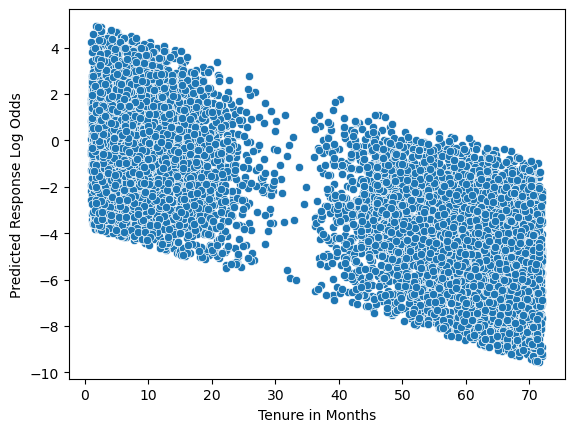

None
Correlation Coefficient: -0.7407098313567145


In [114]:
# Check linearity between continuous variable 'Tenure' and log-odds of predictions of 'Churn'

predictions = model_B.predict(X)
log_odds = np.log(predictions / (1 - predictions))

d = {'Predicted Response Log Odds' : log_odds, 
     'Tenure in Months' : df['Tenure_months'],
     'Predictions': predictions}

# Create dataframe to graph
pred_df = pd.DataFrame(data=d)

sns.scatterplot(x = 'Tenure in Months' , 
                y = "Predicted Response Log Odds", 
                data=d)
print(plt.show())

# Generate correlation coefficient
corr_coef = np.corrcoef(d['Tenure in Months'], d['Predicted Response Log Odds'])
print('Correlation Coefficient: {}'.format(corr_coef[0][1]))